# Regresión con Árboles de Decisión

**Contexto**  
Este conjunto de datos consiste en una lista de puestos en una empresa junto con los niveles y su salario asociado.

**Contenido**  
El conjunto de datos incluye columnas para el Puesto con valores que van desde Analista de negocios, Consultor junior hasta CEO, Nivel que varía de 1 a 10 y, finalmente, el Salario asociado con cada puesto que varía de **45,000 a 1,000,000**.

**Planteamiento del problema**  
El enunciado del problema es que el candidato con nivel 6.5 tenía un salario anterior de 160,000. Para contratar al candidato para un nuevo puesto, a la compañía le gustaría confirmar si está siendo honesto acerca de su último salario para que pueda tomar una decisión de contratación . Para hacer esto, haremos uso del método de Regresión Polinómicapara predecir el salario exacto del empleado.

In [1]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Importar el data set Position_Salaries.csv
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [5]:
# crear las variables X (todas las filas y columna 1) & y (todas las filas y columna 2)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [16]:
# Generar la regresión con el dataset con "DecisionTreeRegressor"
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Predicción de nuestros modelos para el valor 6.5
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth = 6)

In [35]:
adr.fit(X_train, y_train)
Y_pred = adr.predict(X_test)
print(Y_pred)

[80000. 50000.]


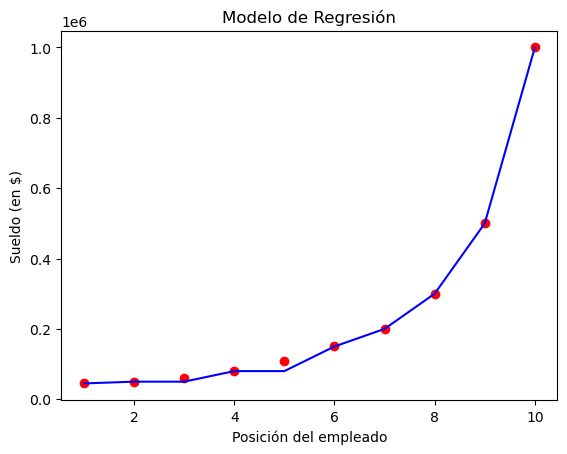


Precisión del modelo:
0.9987602627003338


In [36]:
# Visualización de los resultados
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X, adr.predict(X), color = "blue")
plt.title("Modelo de Regresión")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()
print()
print('Precisión del modelo:')
print(adr.score(X, y))